Install Libraries

In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [165]:
df = pd.read_csv('alz.csv')

In [166]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


Drop irrelevant columns

In [4]:
df = df.drop('DoctorInCharge',axis=1)
df = df.drop('PatientID',axis = 1)

Visualize Data

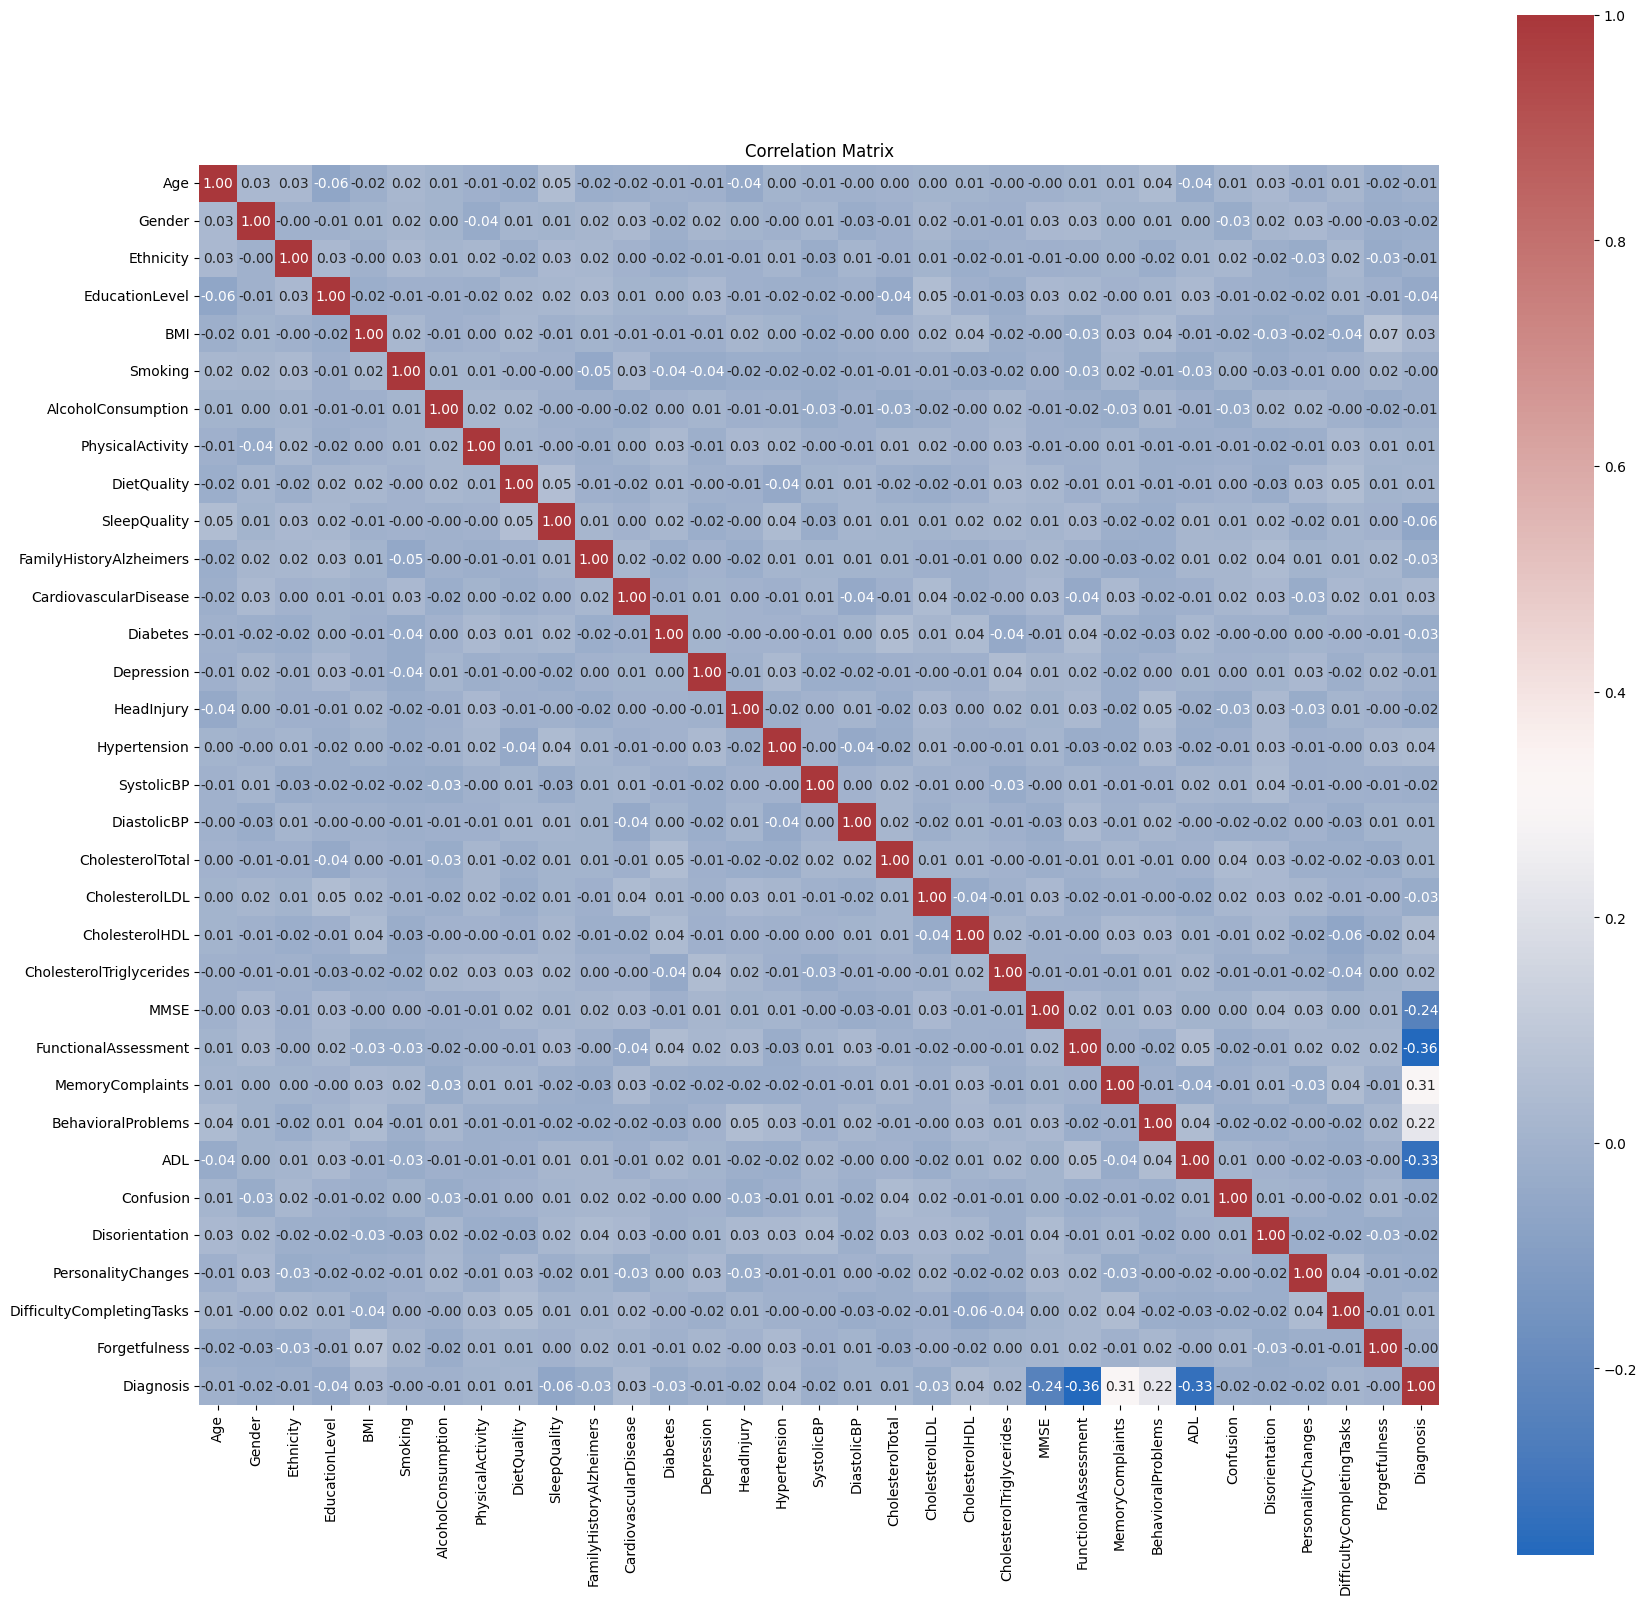

In [23]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='vlag', square=True)
plt.title('Correlation Matrix')
plt.show()

Split Data

In [27]:
X = df.drop('Diagnosis',axis='columns')
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Code For AUC Plotting

In [42]:
def auc_curve(y_test,pred):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
    roc_auc = metrics.auc(fpr,tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()




    acc = f'Accuracy:{metrics.accuracy_score(y_test,pred)}'
    precision = f'Precision:{metrics.precision_score(y_test,pred)}'
    recall = f'Recall:{metrics.recall_score(y_test,pred)}'
    f1 = f'F1:{metrics.f1_score(y_test,pred)}'
    auc = f'AUC:{metrics.roc_auc_score(y_test,pred)}'
    return  acc, precision, recall, f1, auc







Logistic Regression

In [43]:
def logisticregression():
    model = LogisticRegression(solver='lbfgs', max_iter=5000)
    model.fit(X,y)

    pred = model.predict(X_test)

    return auc_curve(y_test,pred)

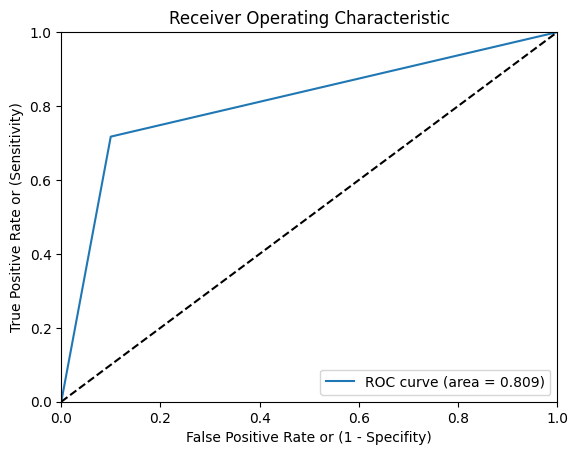

('Accuracy:0.8310077519379845',
 'Precision:0.813953488372093',
 'Recall:0.7172131147540983',
 'F1:0.7625272331154684',
 'AUC:0.8087312456563509')

In [44]:
logisticregression()

KNN Hyperparameter Tuning

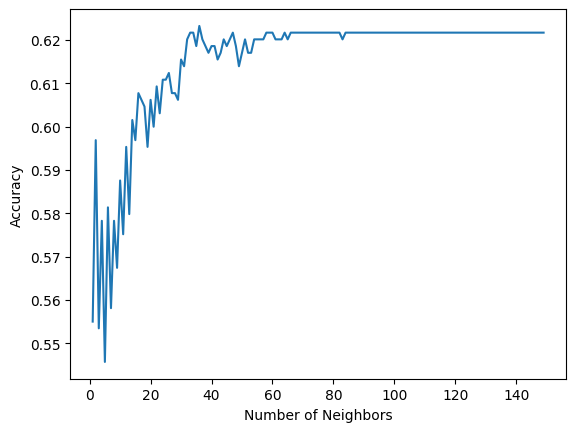

'Best number of Neighbors: 36'

In [52]:
def knn():
    accuracy = 0
    pred_max = []
    
    number_pred = []
    acc_over_time = []
    best = 0

    for i in range(1,150):
        neigh = KNeighborsClassifier(n_neighbors = (i))
        neigh.fit(X_train,y_train)

        pred = neigh.predict(X_test)
        
        acc = metrics.accuracy_score(y_test,pred)
        
        acc_over_time.append(acc)
        number_pred.append(i)
        if acc > accuracy:
            accuracy = acc   
            pred_max = pred
            best = i



    plt.plot(number_pred,acc_over_time)
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.show()
    return f'Best number of Neighbors: {best}'
knn()

Best KNN Prediction

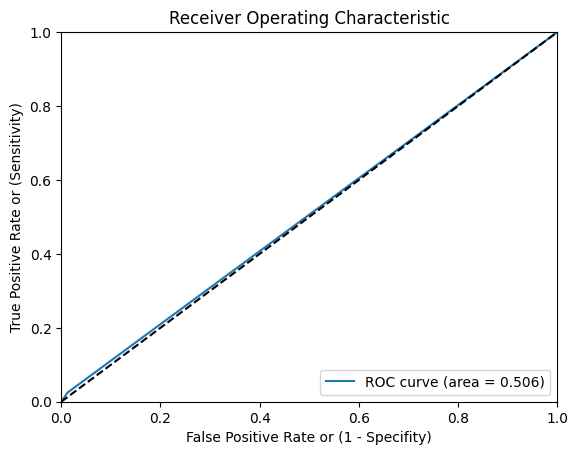

('Accuracy:0.6232558139534884',
 'Precision:0.5454545454545454',
 'Recall:0.02459016393442623',
 'F1:0.047058823529411764',
 'AUC:0.5060606680021258')

In [56]:
def knnbest():
    knn=KNeighborsClassifier(n_neighbors = 36).fit(X_train,y_train)
    pred = knn.predict(X_test)
    return auc_curve(y_test,pred)
knnbest()

Decision Tree Classifier Tuning

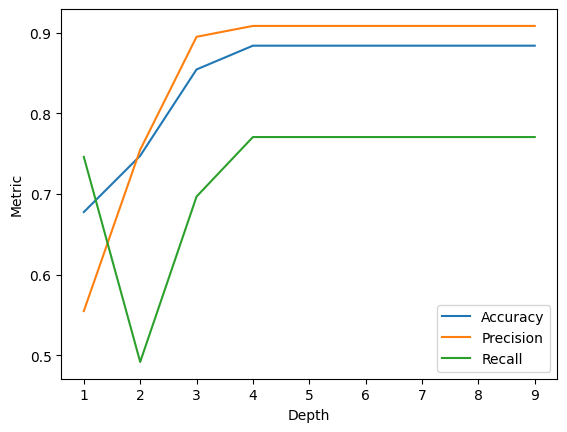

In [89]:

def decisiontree():
    
    acc_over_time = []
    precision_over_time = []
    recall_over_time = []
    depth = []
    
    for i in range(1,10):
        clf = DecisionTreeClassifier(max_leaf_nodes=10,max_depth=i)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        acc = f'Accuracy:{metrics.accuracy_score(y_test,pred)}'
        precision = f'precision:{metrics.precision_score(y_test,pred)}'
        recall = f'recall:{metrics.recall_score(y_test,pred)}'
        depth.append(i)
        acc_over_time.append(metrics.accuracy_score(y_test,pred))
        precision_over_time.append(metrics.precision_score(y_test,pred))
        recall_over_time.append(metrics.recall_score(y_test,pred))
        

        
        


    plt.plot(depth,acc_over_time,label='Accuracy')
    plt.plot(depth,precision_over_time,label='Precision')
    plt.plot(depth,recall_over_time,label='Recall')
    plt.xlabel('Depth')
    plt.ylabel('Metric')
    plt.legend()
    
decisiontree()





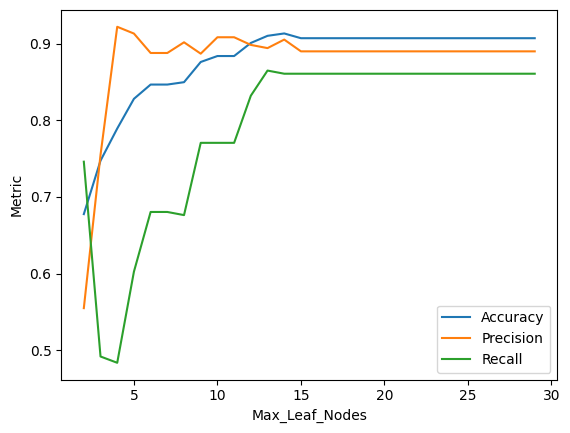

In [91]:
def decisiontree1():
    
    acc_over_time = []
    precision_over_time = []
    recall_over_time = []
    max_leaf_nodes = []
    
    for i in range(2,30):
        clf = DecisionTreeClassifier(max_leaf_nodes=i,max_depth=4)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        acc = f'Accuracy:{metrics.accuracy_score(y_test,pred)}'
        precision = f'precision:{metrics.precision_score(y_test,pred)}'
        recall = f'recall:{metrics.recall_score(y_test,pred)}'
        max_leaf_nodes.append(i)
        acc_over_time.append(metrics.accuracy_score(y_test,pred))
        precision_over_time.append(metrics.precision_score(y_test,pred))
        recall_over_time.append(metrics.recall_score(y_test,pred))
        

        
        


    plt.plot(max_leaf_nodes,acc_over_time,label='Accuracy')
    plt.plot(max_leaf_nodes,precision_over_time,label='Precision')
    plt.plot(max_leaf_nodes,recall_over_time,label='Recall')
    plt.xlabel('Max_Leaf_Nodes')
    plt.ylabel('Metric')
    plt.legend()
        
decisiontree1()

Decision Tree Best Hyperparameters

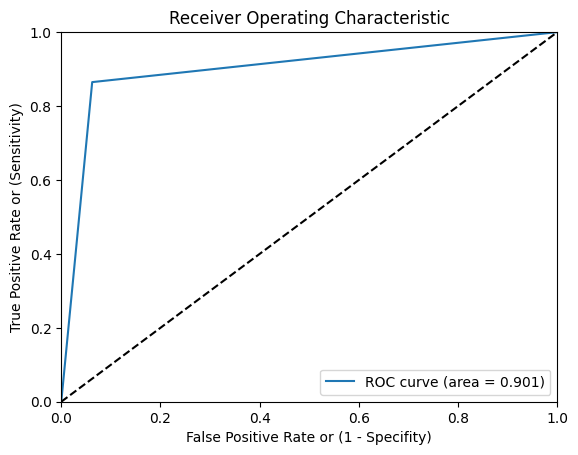

('Accuracy:0.9100775193798449',
 'Precision:0.8940677966101694',
 'Recall:0.8647540983606558',
 'F1:0.8791666666666667',
 'AUC:0.9012049793548914')

In [92]:
def besttree():
        clf = DecisionTreeClassifier(max_leaf_nodes=13,max_depth=4)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        return auc_curve(y_test,pred)
besttree()

Random Forest Classifier Hyperparameter Tuning

[0.6682170542635659, 0.8, 0.8651162790697674, 0.8852713178294573, 0.9038759689922481, 0.9100775193798449, 0.9054263565891473, 0.896124031007752, 0.889922480620155]
[2, 4, 6, 8, 10, 12, 14, 16, 18]


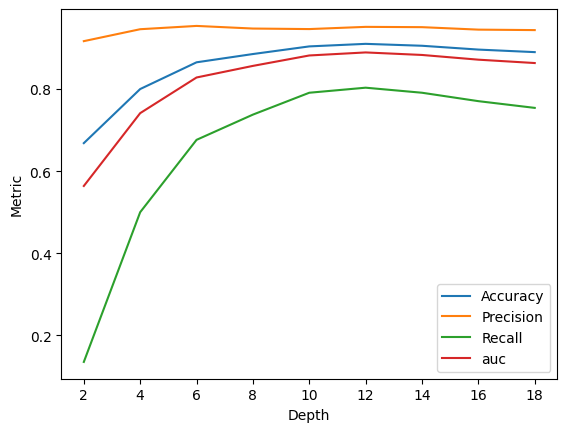

In [114]:
def randomforest():
    acc_over_time = []
    precision_over_time = []
    recall_over_time = []
    depth = []
    auc = []
    
    for i in range(2,20,2):
        rf = RandomForestClassifier(max_depth=i)
        rf.fit(X_train, y_train)
         
        pred = rf.predict(X_test)
        depth.append(i)
        acc_over_time.append(metrics.accuracy_score(y_test,pred))
        precision_over_time.append(metrics.precision_score(y_test,pred))
        recall_over_time.append(metrics.recall_score(y_test,pred))
        auc.append(metrics.roc_auc_score(y_test,pred))

        
        




    
    plt.plot(depth,acc_over_time,label='Accuracy')
    plt.plot(depth,precision_over_time,label='Precision')
    plt.plot(depth,recall_over_time,label='Recall')
    plt.plot(depth,auc,label='auc')
    plt.xlabel('Depth')
    plt.ylabel('Metric')
    plt.legend()


    print(acc_over_time)
    print(depth)
randomforest()

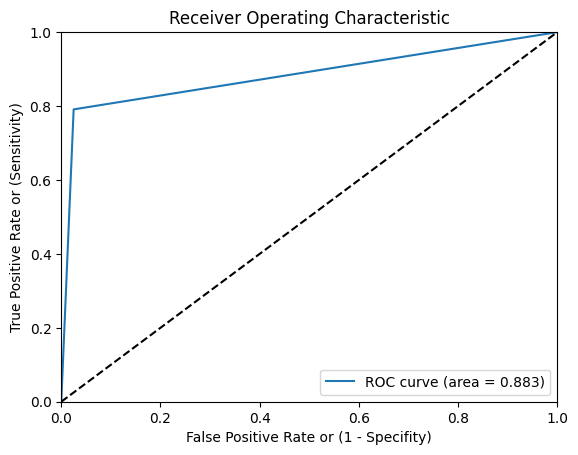

('Accuracy:0.9054263565891473',
 'Precision:0.9507389162561576',
 'Recall:0.7909836065573771',
 'F1:0.8635346756152126',
 'AUC:0.8830229753485139')

In [117]:
def bestforest():
    clrf = RandomForestClassifier(max_depth=12)
    clrf.fit(X_train, y_train)

    pred = clrf.predict(X_test)
        
    return auc_curve(y_test,pred)
bestforest()

Adaboost Tuning

Best Accuracy 0.9348837209302325, Optimal Estimators 84


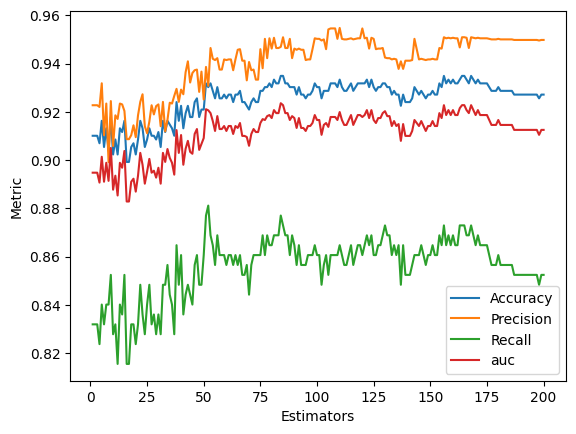

In [152]:
def adaboost():
    acc_over_time = []
    precision_over_time = []
    recall_over_time = []
    estimators = []
    auc = []
    for i in range(1,201):
        weak_learner = DecisionTreeClassifier(max_leaf_nodes=13)
        n_estimators = i

        boost = AdaBoostClassifier(estimator=weak_learner,n_estimators=n_estimators,algorithm="SAMME",random_state=42,).fit(X_train, y_train)
        pred = boost.predict(X_test)

        estimators.append(i)
        acc_over_time.append(metrics.accuracy_score(y_test,pred))
        precision_over_time.append(metrics.precision_score(y_test,pred))
        recall_over_time.append(metrics.recall_score(y_test,pred))
        auc.append(metrics.roc_auc_score(y_test,pred))


    best = 0
    bestdepth = 0
    for j in range(len(acc_over_time)):
        if acc_over_time[j] > best:
            best = acc_over_time[j]
            bestdepth = j+1
    print(f'Best Accuracy {best}, Optimal Estimators {bestdepth}')
    plt.plot(estimators,acc_over_time,label='Accuracy')
    plt.plot(estimators,precision_over_time,label='Precision')
    plt.plot(estimators,recall_over_time,label='Recall')
    plt.plot(estimators,auc,label='auc')
    plt.xlabel('Estimators')
    plt.ylabel('Metric')
    plt.legend()

adaboost()

Optimal Adaboost

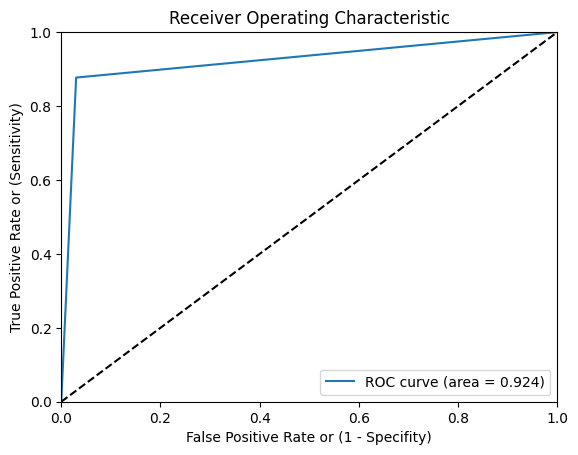

('Accuracy:0.9348837209302325',
 'Precision:0.9469026548672567',
 'Recall:0.8770491803278688',
 'F1:0.9106382978723404',
 'AUC:0.9235619966477249')

In [153]:
def bestada():
        weak_learner = DecisionTreeClassifier(max_leaf_nodes=13)
        n_estimators = 84

        boost = AdaBoostClassifier(estimator=weak_learner,n_estimators=n_estimators,algorithm="SAMME",random_state=42,).fit(X_train, y_train)
        pred = boost.predict(X_test)
        return auc_curve(y_test,pred)
bestada()

Gradient Boosting

Best Accuracy 0.9348837209302325, Optimal Estimators 14


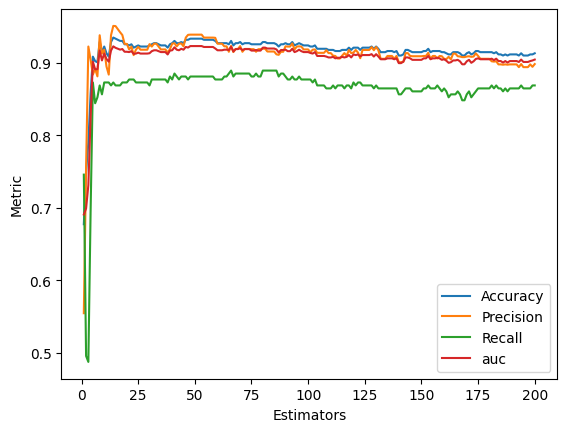

In [154]:
def gradientboost():
    acc_over_time = []
    precision_over_time = []
    recall_over_time = []
    estimators = []
    auc = []
    for i in range(1,201):
        boost = GradientBoostingClassifier(n_estimators=i, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
        pred = boost.predict(X_test)

        estimators.append(i)
        acc_over_time.append(metrics.accuracy_score(y_test,pred))
        precision_over_time.append(metrics.precision_score(y_test,pred))
        recall_over_time.append(metrics.recall_score(y_test,pred))
        auc.append(metrics.roc_auc_score(y_test,pred))


    best = 0
    bestdepth = 0
    for j in range(len(acc_over_time)):
        if acc_over_time[j] > best:
            best = acc_over_time[j]
            bestdepth = j+1
    print(f'Best Accuracy {best}, Optimal Estimators {bestdepth}')
    plt.plot(estimators,acc_over_time,label='Accuracy')
    plt.plot(estimators,precision_over_time,label='Precision')
    plt.plot(estimators,recall_over_time,label='Recall')
    plt.plot(estimators,auc,label='auc')
    plt.xlabel('Estimators')
    plt.ylabel('Metric')
    plt.legend()

gradientboost()

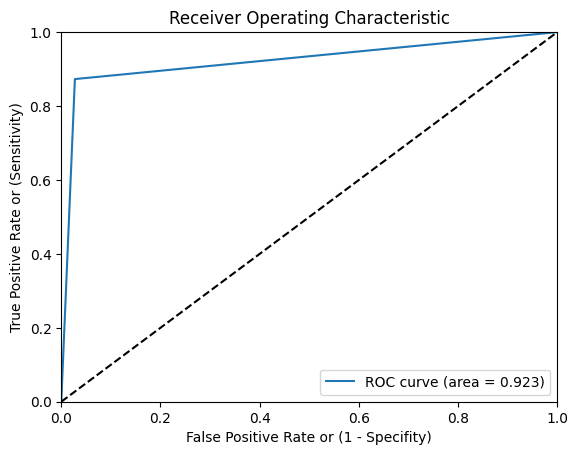

('Accuracy:0.9348837209302325',
 'Precision:0.9508928571428571',
 'Recall:0.8729508196721312',
 'F1:0.9102564102564102',
 'AUC:0.9227596991128736')

In [155]:
def bestboost():
    boost = GradientBoostingClassifier(n_estimators=14, learning_rate=1.0,
        max_depth=1, random_state=0).fit(X_train, y_train)
    pred = boost.predict(X_test)
    return auc_curve(y_test,pred)
bestboost()

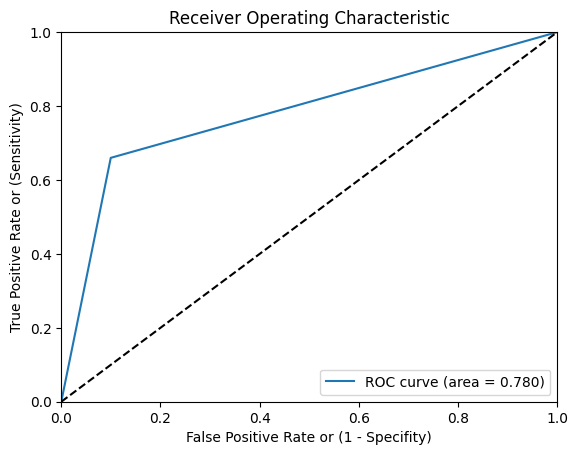

('Accuracy:0.8093023255813954',
 'Precision:0.8009950248756219',
 'Recall:0.6598360655737705',
 'F1:0.7235955056179775',
 'AUC:0.780042721066187')

In [178]:
def SVC_test():
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    return auc_curve(y_test,pred)
SVC_test()
    

In [1]:
from tabulate import tabulate


data = [['SVM','.8093','.8010','.6598','.7236','.7800'],
       ['Gradient Boosting','.9349','.9509','.8730','.9103','.9228'],
       ['AdaBoost','.9349','.9469','.8770','.9106','.9236'],
       ['Random Forest','.9054','.9507','.7910','.8635','.8830'],
       ['Decision Tree','.9101','.8941','.8648','.8792','.9012'],
       ['KNN','.6233','.5454','.0246','.0471','.5061'],
       ['Logistic Regression','.8310','.8140','.7172','.7625','.8087']]
head = ['Method', 'Accuracy', 'Precision','Recall','F1','AUC']

print(tabulate(data, headers=head, tablefmt="grid"))


+---------------------+------------+-------------+----------+--------+--------+
| Method              |   Accuracy |   Precision |   Recall |     F1 |    AUC |
+=====================+============+=============+==========+========+========+
| SVM                 |     0.8093 |      0.801  |   0.6598 | 0.7236 | 0.78   |
+---------------------+------------+-------------+----------+--------+--------+
| Gradient Boosting   |     0.9349 |      0.9509 |   0.873  | 0.9103 | 0.9228 |
+---------------------+------------+-------------+----------+--------+--------+
| AdaBoost            |     0.9349 |      0.9469 |   0.877  | 0.9106 | 0.9236 |
+---------------------+------------+-------------+----------+--------+--------+
| Random Forest       |     0.9054 |      0.9507 |   0.791  | 0.8635 | 0.883  |
+---------------------+------------+-------------+----------+--------+--------+
| Decision Tree       |     0.9101 |      0.8941 |   0.8648 | 0.8792 | 0.9012 |
+---------------------+------------+----

In [ ]:
Github link: https://github.com/Kolujo/Machine-Learning-Final